In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [5]:
# Filter for US Data Analysts Roles
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

# Top 10 Data Analysts job location and changing it into a dataframe
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()
df_plot

,count
job_location,
Anywhere,5106
"New York, NY",3035
"Atlanta, GA",2741
"Chicago, IL",2337
"Austin, TX",1919
"Dallas, TX",1862
"Washington, DC",1592
"Charlotte, NC",1433
"Tampa, FL",1431


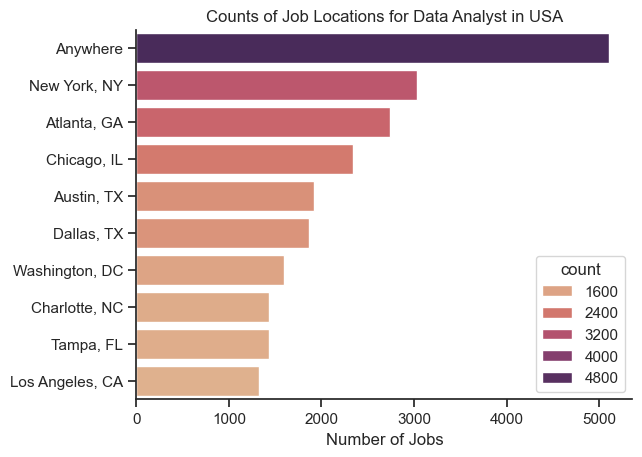

In [14]:
# Creating a seaborn barplot
import seaborn as sns
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='flare')
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in USA')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

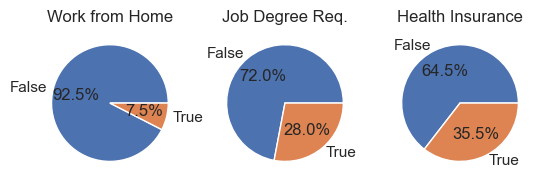

In [27]:

# Creating subplots for above values using matplot subplots
fig, ax = plt.subplots(1, 3)

# Creating Dictionary list for values
dict_colum = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance'
}

for i, (column, title) in enumerate(dict_colum.items()):
    ax[i].pie(df_da_us[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%')
    ax[i].set_title(title)

plt.show()

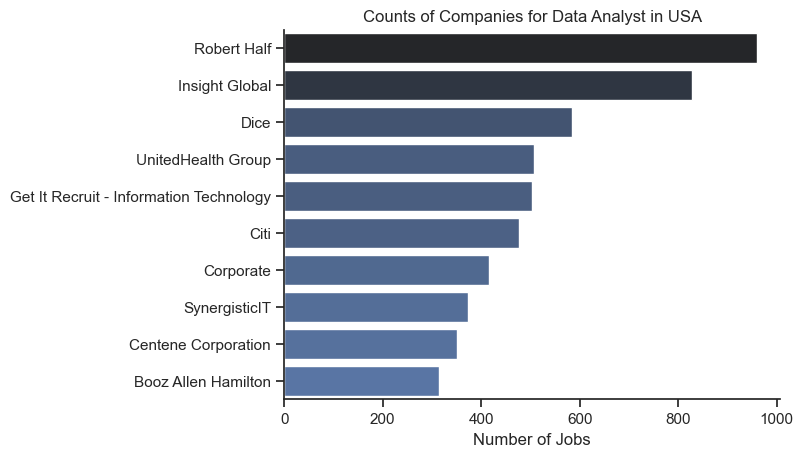

In [28]:
# Top Company for Job Data Analyst
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()

# Create Seaborn plot
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in USA')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

# Modifying above data for colorblind

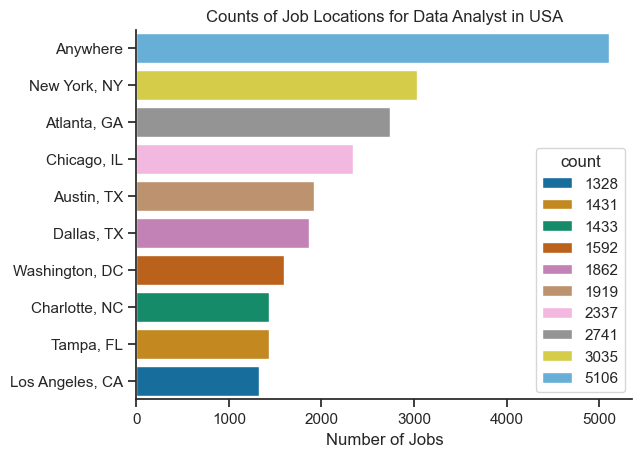

In [30]:
# Modifying above code for Colorblind
# Creating a seaborn barplot
# Filter for US Data Analysts Roles
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')]

# Top 10 Data Analysts job location and changing it into a dataframe
df_plot = df_da_us['job_location'].value_counts().head(10).to_frame()
df_plot
import seaborn as sns
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='colorblind')
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in USA')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

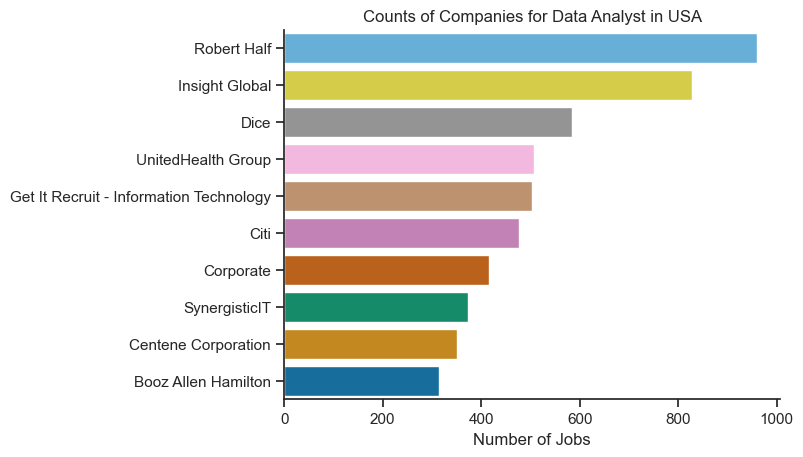

In [31]:
# Modifying data for colorblind
# Top Company for Job Data Analyst
df_plot = df_da_us['company_name'].value_counts().head(10).to_frame()

# Create Seaborn plot
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='colorblind', legend=False)
sns.despine()
plt.title('Counts of Companies for Data Analyst in USA')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()